In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 

In [2]:
np.random.seed(777)
total_samples = 20

In [3]:
land_area = np.random.rand(total_samples) * 50 + 24
building_year = np.random.randint(1750, 2025, total_samples)

first_floor_area = np.random.randint(50, 75, total_samples)*0.01 * land_area
second_floor_area = first_floor_area * np.random.randint(40, 100, total_samples)*0.01

rooms = (first_floor_area + second_floor_area) * np.random.randint(12, 23, total_samples) / 100
rooms = rooms.astype(np.int64)

rooms_without_restrooms = rooms * np.random.randint(50, 75, total_samples) / 100
rooms_without_restrooms = rooms_without_restrooms.astype(np.int64)

bathrooms = 1 + (rooms - rooms_without_restrooms - 1) * np.random.randint(80, 100, total_samples) / 100
bathrooms = bathrooms.astype(np.int64)

price = ((np.random.randint(60, 150, total_samples) * land_area * 75) // 1000) * 1000

sq_meter_to_sq_ft = 3.3**2
land_area *= sq_meter_to_sq_ft
first_floor_area *= sq_meter_to_sq_ft
second_floor_area *= sq_meter_to_sq_ft

houses_dict = {
    'land_area': land_area,
    'building_year': building_year,
    'first_floor_area': first_floor_area,
    'second_floor_area': second_floor_area,
    'bathrooms': bathrooms,
    'rooms_without_restrooms': rooms_without_restrooms,
    'rooms': rooms,
    'price': price
}

df = pd.DataFrame(houses_dict)
df['building_area'] = df['first_floor_area'] + df['second_floor_area']

In [4]:
df.sample(3)

,land_area,building_year,first_floor_area,second_floor_area,bathrooms,rooms_without_restrooms,rooms,price,building_area
13,448.308923,1778,327.265514,209.449929,3,3,7,240000.0,536.715443
2,295.138828,2021,159.374967,89.249982,1,1,3,164000.0,248.624949
15,602.474661,1842,385.583783,258.341135,4,6,11,473000.0,643.924917


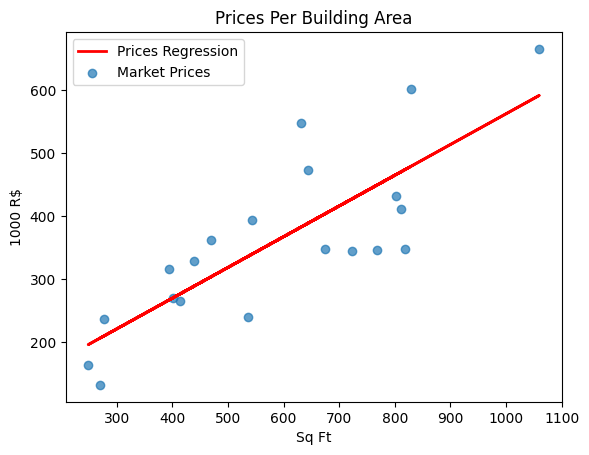

In [5]:
area_df = df[['building_area']]
prices = df['price'] / 1000

model = LinearRegression()
model.fit(area_df, prices)


model_prices = model.predict(area_df)
plt.plot(area_df, model_prices, color='r', label='Prices Regression', linewidth=2)
plt.scatter(area_df, prices, alpha=0.7, label='Market Prices')
plt.title('Prices Per Building Area')
plt.ylabel('1000 R$')
plt.xlabel('Sq Ft')
plt.legend()
plt.show()